# QCTO - Workplace Module

### Project Title: Analyzing Medical Malpractice Claims: Identifying Trends and Risk Factors
#### Done By: Motshabi Mohola

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** The purpose of this project is to analyze a comprehensive dataset of medical malpractice claims to identify trends, risk factors, and correlations between various variables. The goal is to provide insights that can help reduce the frequency and severity of medical malpractice claims, ultimately contributing to improved patient outcomes and reduced healthcare costs.

* **Details:** 
    
    - Background and Significance:

Medical malpractice claims are a significant concern in the healthcare industry, resulting in substantial financial costs and emotional distress for patients, families, and healthcare providers. According to recent studies, the annual cost of medical malpractice in the United States is estimated to be $55.6 billion, accounting for 2.4% of annual healthcare spending. Furthermore, a staggering 7.4% of physicians licensed in the US face malpractice claims each year.

    - Research Questions:

This project aims to address the following research questions:

1. What are the most common specialties and procedures associated with medical malpractice claims?
2. Are there any correlations between claim severity, patient age, and physician specialty?
3. Do patients represented by private attorneys tend to receive higher claim payments?
4. Are there any differences in claim outcomes based on patient demographics, such as gender and marital status?


By exploring these questions and analyzing the dataset, this project seeks to provide valuable insights that can inform healthcare policy, medical practice, and patient safety initiatives.

---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** 
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [184]:
import pandas as pd #loading the dataset
import matplotlib.pyplot as plt #ploting graphs
import seaborn as sns
import numpy as np #mathematical calculations
from sklearn.preprocessing import StandardScaler #standadization
from sklearn.model_selection import train_test_split #spliting the data

---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

**Purpose**
The purpose of this dataset is to provide a comprehensive collection of medical malpractice claims.

**Sources**
The data was downloaded from Kaggle, a popular platform for data science competitions and hosting datasets.
Link [https://www.kaggle.com/datasets/gabrielsantello/medical-malpractice-insurance-dataset?resource=download]

**Dataset Description**
The dataset contains 79,210 records of medical malpractice claims.

**Size and Scope**
The dataset includes claims from various sources, with a focus on medical malpractice cases.

Types of Data
The dataset contains a mix of numerical and categorical.
- Amount: Numerical
- Severity: Numerical (ordinal, 1 = emotional trauma, 9 = death, it's represented as numerical values)
- Age: Numerical
- Private Attorney: its represented as integer (will be later fixed) but its Categorical (binary, 1 (Yes) and 0 (No))
- Marital Status: its represented as integer (will later be fixed) but its Categorical (ordinal, 2 ( likely "Married") and 1 (likely "Single"))
- Specialty: object
- Insurance: object
- Gender: object
    
The dataset includes the following variables:

- claim_id: Unique identifier for each claim
- specialty: Specialty of the physician
- state: State where the claim was filed
- year: Year the claim was filed
- claim_amount: Amount of the claim
- severity: Severity of the injury
- outcome: Outcome of the claim


---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [120]:
#load the dataset
df = pd.read_csv('medicalmalpractice.csv')
#display the first few rows
print(df.head())


   Amount  Severity  Age  Private Attorney  Marital Status        Specialty  \
0   57041         7   62                 1               2  Family Practice   
1  324976         6   38                 1               2            OBGYN   
2  135383         4   34                 1               2       Cardiology   
3  829742         7   42                 1               1       Pediatrics   
4  197675         3   60                 0               2            OBGYN   

           Insurance  Gender  
0            Private    Male  
1       No Insurance  Female  
2            Unknown    Male  
3       No Insurance  Female  
4  Medicare/Medicaid  Female  


In [126]:
# concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79210 entries, 0 to 79209
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Amount            79210 non-null  int64 
 1   Severity          79210 non-null  int64 
 2   Age               79210 non-null  int64 
 3   Private Attorney  79210 non-null  int64 
 4   Marital Status    79210 non-null  int64 
 5   Specialty         79210 non-null  object
 6   Insurance         79210 non-null  object
 7   Gender            79210 non-null  object
dtypes: int64(5), object(3)
memory usage: 4.8+ MB


In [128]:
# descriptive statistics for numeric columns
print(df.describe())

              Amount      Severity           Age  Private Attorney  \
count   79210.000000  79210.000000  79210.000000      79210.000000   
mean   157484.554816      4.799659     42.701868          0.660889   
std    193135.093293      2.083439     19.811063          0.473411   
min      1576.000000      1.000000      0.000000          0.000000   
25%     43670.250000      3.000000     28.000000          0.000000   
50%     98131.000000      4.000000     43.000000          1.000000   
75%    154675.250000      7.000000     58.000000          1.000000   
max    926411.000000      9.000000     87.000000          1.000000   

       Marital Status  
count    79210.000000  
mean         1.889559  
std          1.002502  
min          0.000000  
25%          1.000000  
50%          2.000000  
75%          2.000000  
max          4.000000  


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [130]:
# check for missing values
df.isnull().sum()

Amount              0
Severity            0
Age                 0
Private Attorney    0
Marital Status      0
Specialty           0
Insurance           0
Gender              0
dtype: int64

In [132]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Identify outliers for each numerical column
outlier_counts = {}
numerical_columns = ["Amount", "Severity", "Age", "Private Attorney" , "Marital Status"]

for col in numerical_columns:
    outliers = detect_outliers_iqr(df, col)
    outlier_counts[col] = len(outliers)

outlier_counts

{'Amount': 10540,
 'Severity': 0,
 'Age': 0,
 'Private Attorney': 0,
 'Marital Status': 10362}

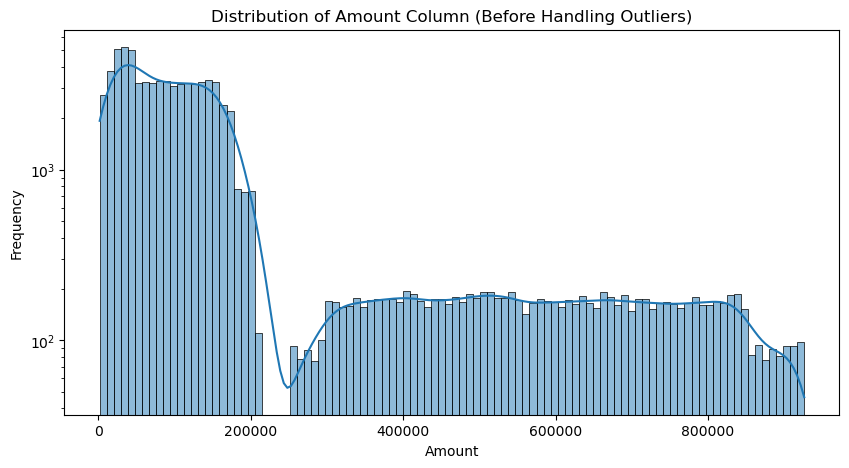

In [134]:
# Plot distribution of "Amount" column
plt.figure(figsize=(10,5))
sns.histplot(df["Amount"], bins=100, kde=True)
plt.title("Distribution of Amount Column (Before Handling Outliers)")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.yscale("log")  # Log scale to better visualize skewed data
plt.show()

In [136]:
# finding the 99th percentile value in the Amount column
percentile_99 = df["Amount"].quantile(0.99)
print(percentile_99)

847620.55


In [138]:
# check the highest values to check for outliers in the Amount Column
print(df["Amount"].nlargest(10))

36698    926411
12406    926359
14461    926014
49558    925964
35823    925802
34590    925722
70166    925700
50464    925639
7154     925509
21906    925430
Name: Amount, dtype: int64


The 99th percentile is 847 620.55, meaning the highest 1% of cases have payouts above this value. The top 10 highest values are all above 925 000, with some reaching 926 411. These values are not drastically different from the 99th percentile, so they might be legitimate high claims rather than data errors. I want to keep meaningful data therefore I will set all values above 847 620 to 847 620 to reduce extreme skewness while keeping major variations preventing large claims from distorting the analysis.

In [140]:
# cap at 99th percentile
df["Amount_Capped"] = df["Amount"].clip(upper=847620.55)

In [142]:
# Check unique values and counts of Marital Status
print(df["Marital Status"].value_counts())

Marital Status
2    41220
1    22802
4    10362
0     3832
3      994
Name: count, dtype: int64


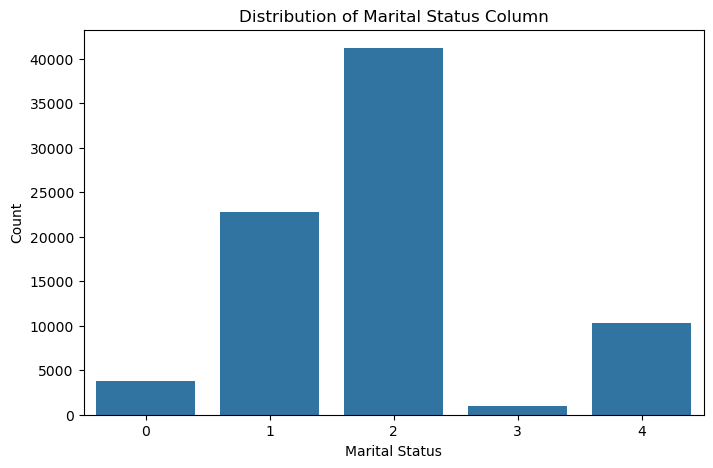

In [144]:
# plot the distribution
plt.figure(figsize=(8,5))
sns.barplot(x=df["Marital Status"].value_counts().index, 
            y=df["Marital Status"].value_counts().values)
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.title("Distribution of Marital Status Column")
plt.show()

since both Private Attorney and Marital Status are set to int, we can convert to categoral which will prevent any issues for future use.


In [146]:
# Marital Status from integer to categoral
df["Marital Status"] = df["Marital Status"].astype("category")
# Private Attorney from integer to categoral
df["Private Attorney"] = df["Private Attorney"].astype("category")


In [148]:
# data type of each column
print(df.dtypes)

Amount                 int64
Severity               int64
Age                    int64
Private Attorney    category
Marital Status      category
Specialty             object
Insurance             object
Gender                object
Amount_Capped        float64
dtype: object


The values in Marital Status column are now categoral with each number representing the following: 0- single, 1-married, 2-divorced, 3-widowed, 4-separated. The values in Private Attorney are also now categoral with 1 meaning Yes and 0 meaning No.

In [161]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(duplicate_count)

1


In [163]:
# Remove duplicates
df = df.drop_duplicates()

In [165]:
# Return the number of duplicates removed and the new dataset shape
duplicate_count, df.shape

(1, (79209, 9))

In [171]:
# Normalize Age
scaler = StandardScaler()
df["Age_Scaled"] = scaler.fit_transform(df[["Age"]])

In [ ]:
Now the data has been centered and mean = 0 and standard deviation = 1.

In [175]:
# make Severity into ordinal
df['Severity'] = pd.Categorical(df['Severity'], categories=[1, 2, 3, 4, 5, 6, 7, 8, 9], ordered=True)

making the "Severity" column ordinal, the computer now knows that:
- These numbers aren't just random values
- They have a specific order that matters(1 being the lowest severity and 9 being the highest severity)

In [178]:
# data type of each column
print(df.dtypes)

Amount                 int64
Severity            category
Age                    int64
Private Attorney    category
Marital Status      category
Specialty             object
Insurance             object
Gender                object
Amount_Capped        float64
Age_Scaled           float64
dtype: object


In [206]:
#feature extraction
# Age Binning
df["Age_Group"] = pd.cut(df["Age"], bins=[0, 30, 50, 100], labels=["Young", "Middle-aged", "Senior"])

Instead of treating age as a continuous number, grouping it into Young, Middle-aged, and Senior helps capture different risk patterns.

In [209]:
print(df)

       Amount Severity  Age Private Attorney Marital Status  \
0       57041        7   62                1              2   
1      324976        6   38                1              2   
2      135383        4   34                1              2   
3      829742        7   42                1              1   
4      197675        3   60                0              2   
...       ...      ...  ...              ...            ...   
79205   25305        4   64                1              2   
79206   43098        3   87                0              4   
79207   35398        3   81                0              4   
79208  154228        9   19                0              4   
79209  168298        7    4                1              1   

                Specialty          Insurance  Gender  Amount_Capped  \
0         Family Practice            Private    Male        57041.0   
1                   OBGYN       No Insurance  Female       324976.0   
2              Cardiology     

In [204]:
#spliting the data
# Define the feature matrix (X) and the target variable (y)
X = df.drop('Amount_Capped', axis=1)
y = df['Amount_Capped']

# Split the data into training(80%) and testing(20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

Kaggle : http://kaggle.com/datasets/gabrielsantello/medical-malpractice-insurance-dataset?resource=download

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
Mohola Motshabi Hope
